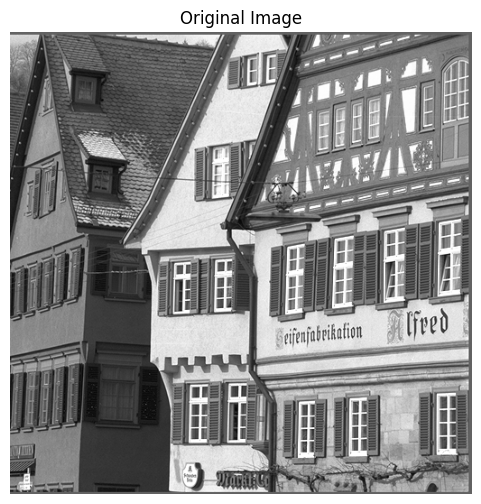

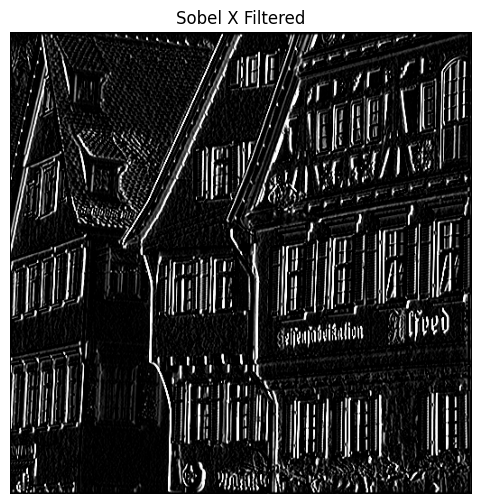

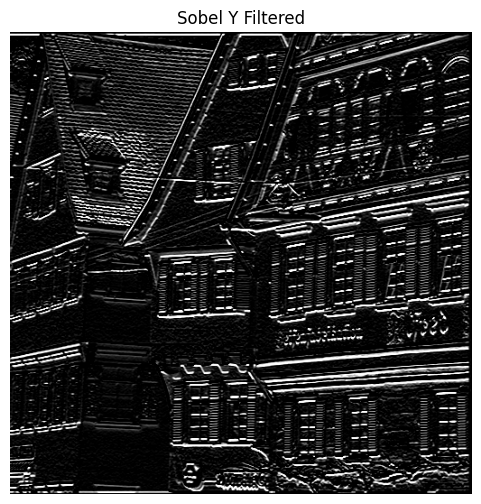

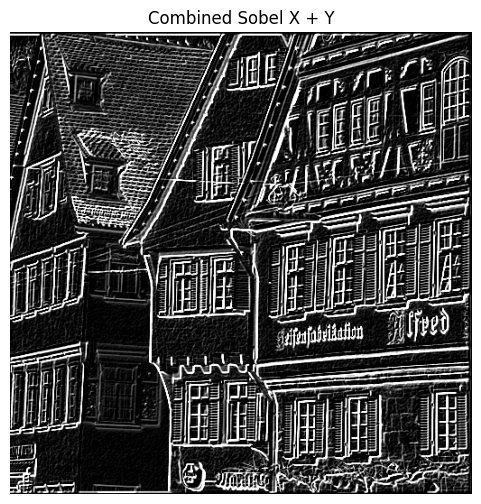

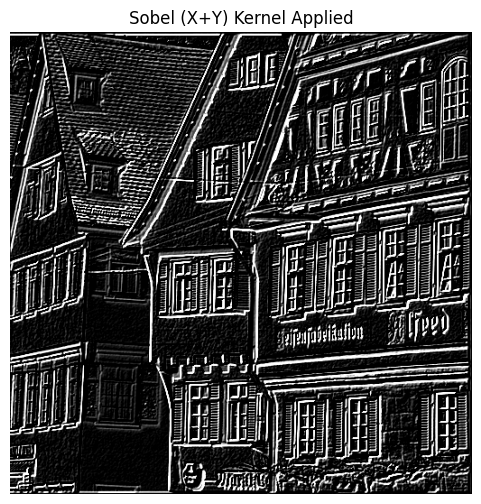

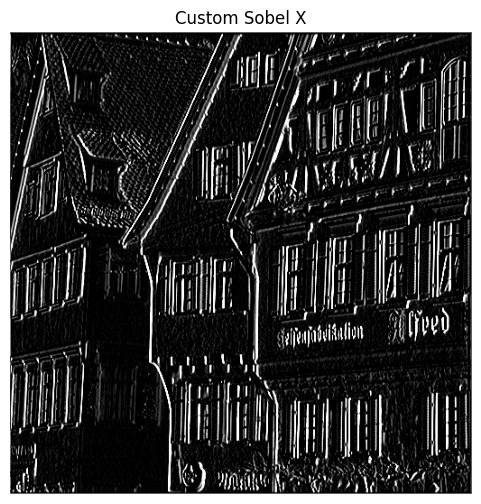

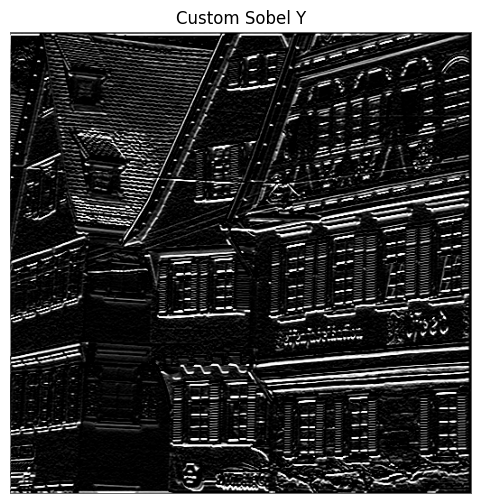

In [1]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Jupyter magic
%matplotlib inline

# Helper function to display images
def show_img(img, title='Image', cmap_type=None):
    plt.figure(figsize=(6, 6))
    if len(img.shape) == 2:
        plt.imshow(img, cmap=cmap_type if cmap_type else 'gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image (change path as needed)
img_path = "C:\\Users\\HP\\Downloads\\Standard Images\\houses.bmp"
img = cv2.imread(img_path)

if img is None:
    raise FileNotFoundError("Image not found. Check the file path.")

# Display Original Image
show_img(img, "Original Image")

# Sobel Kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0,  0,  0],
                    [1,  2,  1]])

# Apply Sobel X filter
img_x = cv2.filter2D(img, -1, sobel_x)
show_img(img_x, "Sobel X Filtered")

# Apply Sobel Y filter
img_y = cv2.filter2D(cv2.imread(img_path), -1, sobel_y)
show_img(img_y, "Sobel Y Filtered")

# Combine X and Y edges
final = cv2.add(img_x, img_y)
show_img(final, "Combined Sobel X + Y")

# Apply combined kernel
final_sobel_kernel = sobel_x + sobel_y
img_combined_kernel = cv2.filter2D(cv2.imread(img_path), -1, final_sobel_kernel)
show_img(img_combined_kernel, "Sobel (X+Y) Kernel Applied")

# Custom Image Filtering Function
def imagefiltering(image, kernel):
    linearkernel = kernel.reshape(-1)
    newimg = image.copy()

    for x in range(1, image.shape[0] - 1):
        for y in range(1, image.shape[1] - 1):
            region = image[x-1:x+2, y-1:y+2]
            for c in range(image.shape[2]):  # per channel
                patch = region[:, :, c].reshape(-1)
                value = np.sum(patch * linearkernel)
                newimg[x, y, c] = np.clip(value, 0, 255)
    return newimg

# Custom Filtering using Sobel X
custom_img_x = imagefiltering(img, sobel_x)
show_img(custom_img_x, "Custom Sobel X")

# Custom Filtering using Sobel Y
custom_img_y = imagefiltering(img, sobel_y)
show_img(custom_img_y, "Custom Sobel Y")